<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Decision_Tree_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df[['Survived','Pclass','Sex','Age','Fare']]

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


#Cleaning Dataset

In [6]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


In [7]:
df.groupby('Sex')['Age'].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [8]:
df['Age']=df.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

## Changing category column to numerical column

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df['Sex']=le.fit_transform(df['Sex'])

In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [13]:
X = df[['Pclass','Sex','Age','Fare']]
y= df['Survived']

## Doing train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [18]:
from sklearn.metrics import accuracy_score
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.7723880597014925

## Checking accuracy of training dataset

In [19]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9807383627608347

#### Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted and to avoid this we will use Pruning method later.

# Visualizing our final decision tree

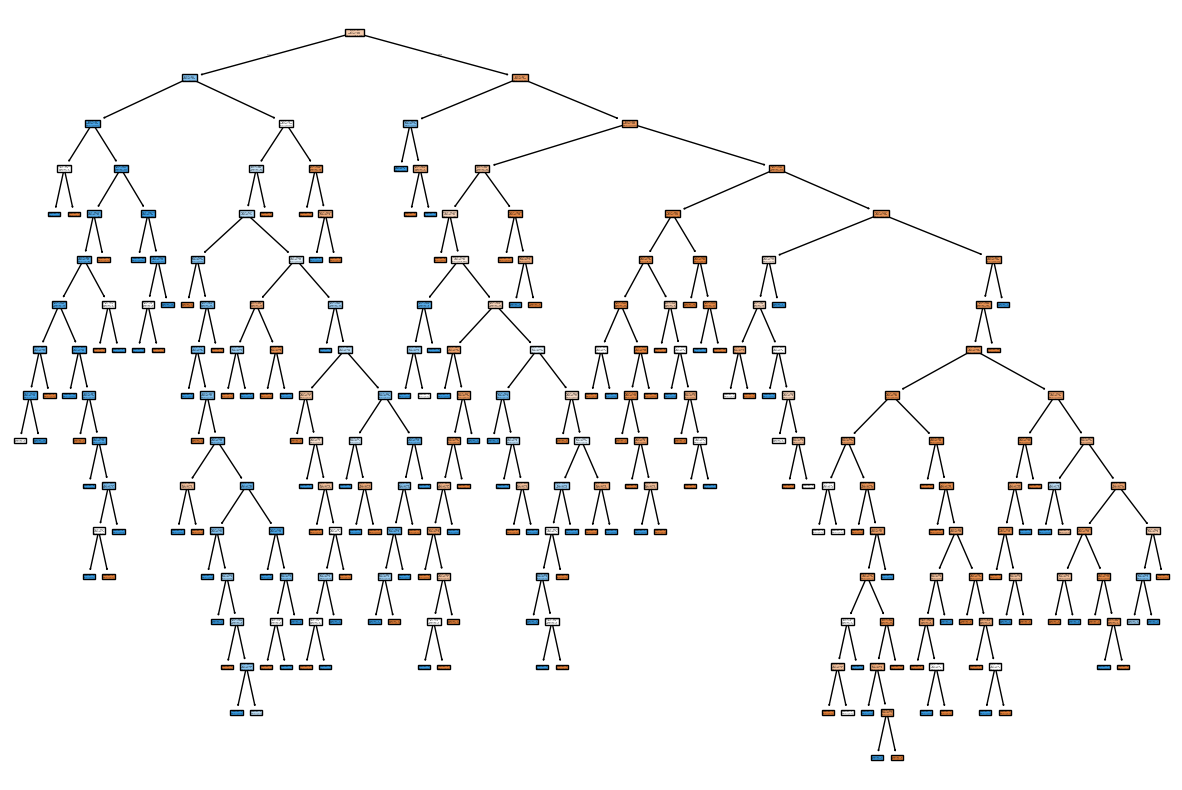

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[132  22]
 [ 39  75]]


# Evaluating our training dataset

In [22]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.99      0.96      0.97       228

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

[[392   3]
 [  9 219]]


# Finding false positive rate and true positive rate

In [23]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [24]:
dt_probs = clf.predict_proba(X_test)[:,1]

In [25]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)

# Plotting *ROC* curve for our Decision Tree

In [26]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

np.float64(0.7737240829346091)

In [27]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

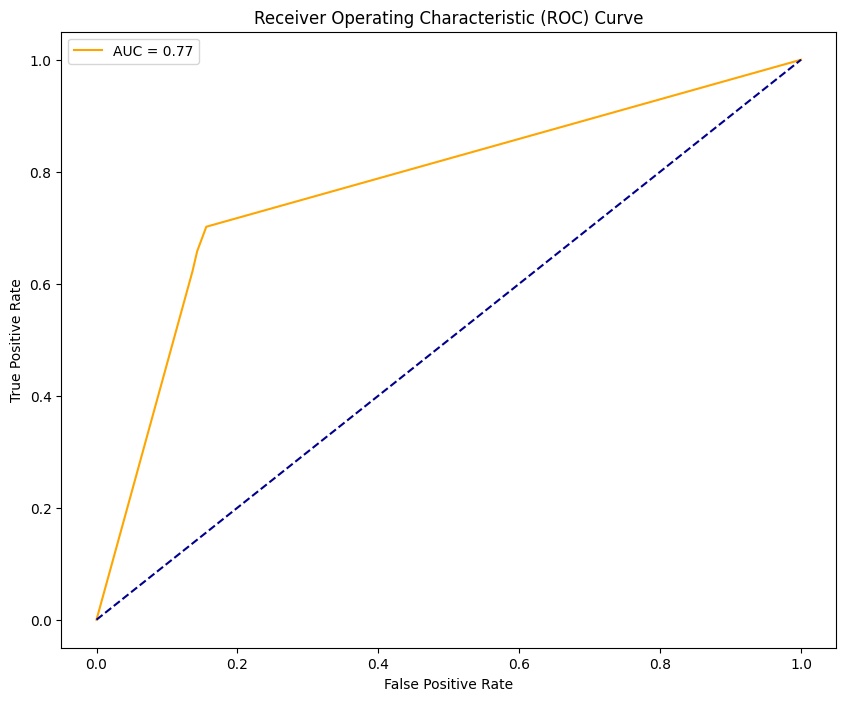

In [28]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [29]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

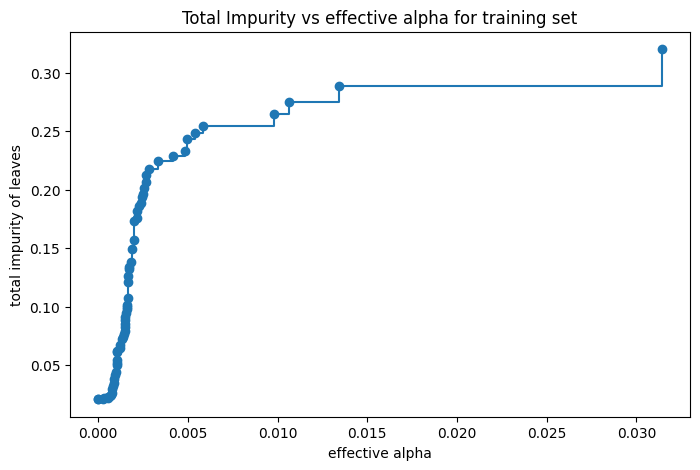

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14413839230607062


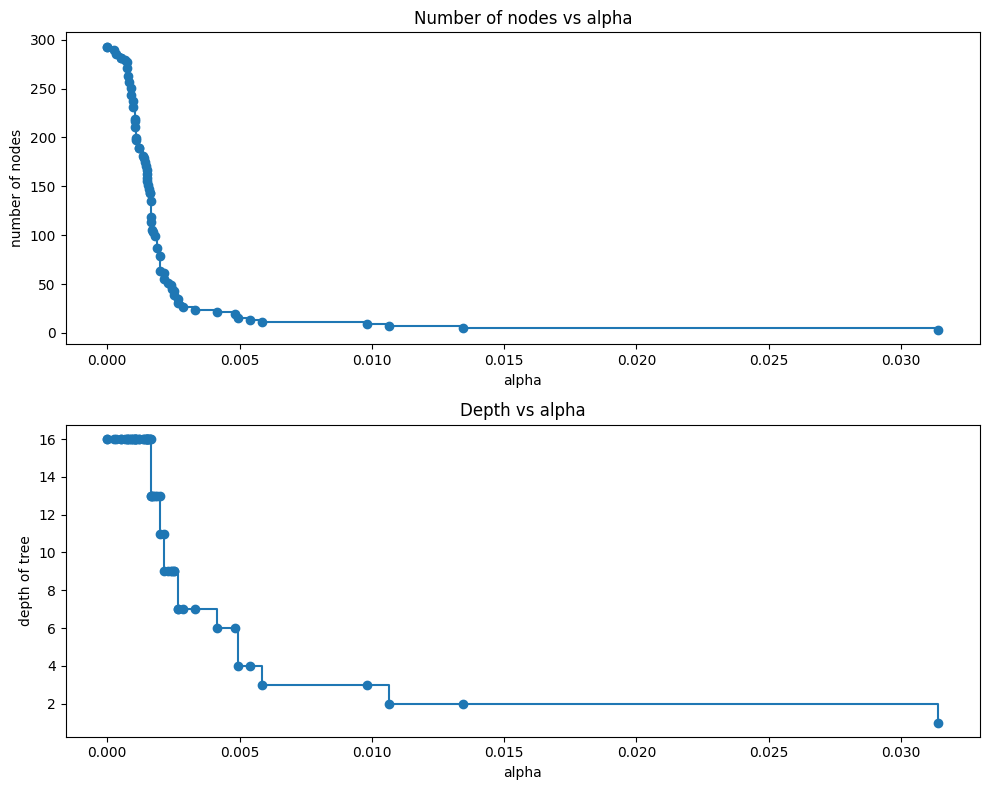

In [32]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

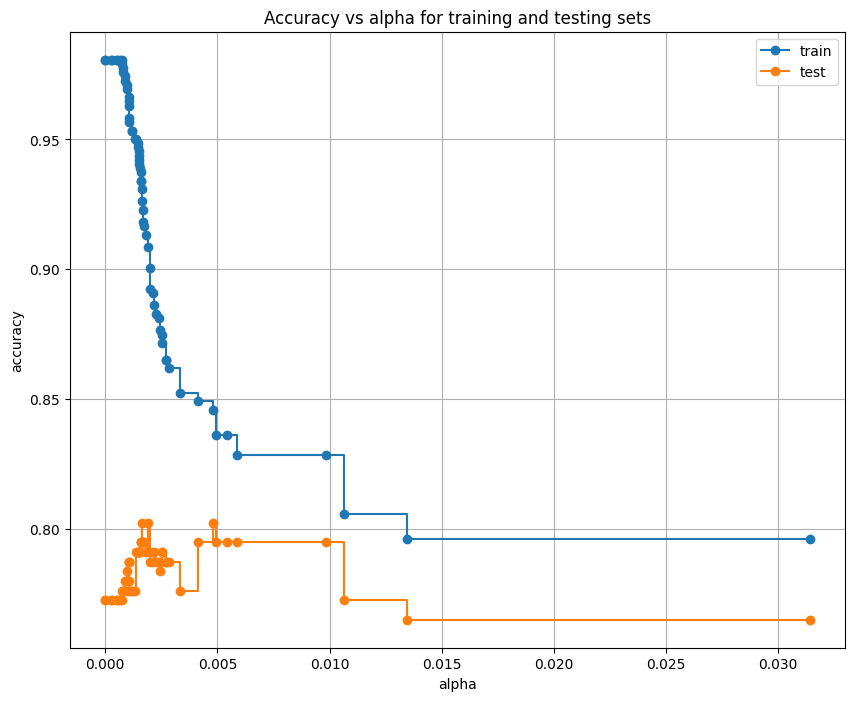

In [33]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [34]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

### Accuracy of test dataset

In [35]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7649253731343284

#Accuracy of training dataset

In [36]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.7961476725521669

# Visualizing after pruning

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.464\nsamples = 623\nvalue = [395.0, 228.0]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.394\nsamples = 219\nvalue = [59, 160]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.14\nsamples = 119\nvalue = [9, 110]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.8, 0.5, 'gini = 0.28\nsamples = 404\nvalue = [336, 68]'),
 Text(0.7, 0.6666666666666667, '  False')]

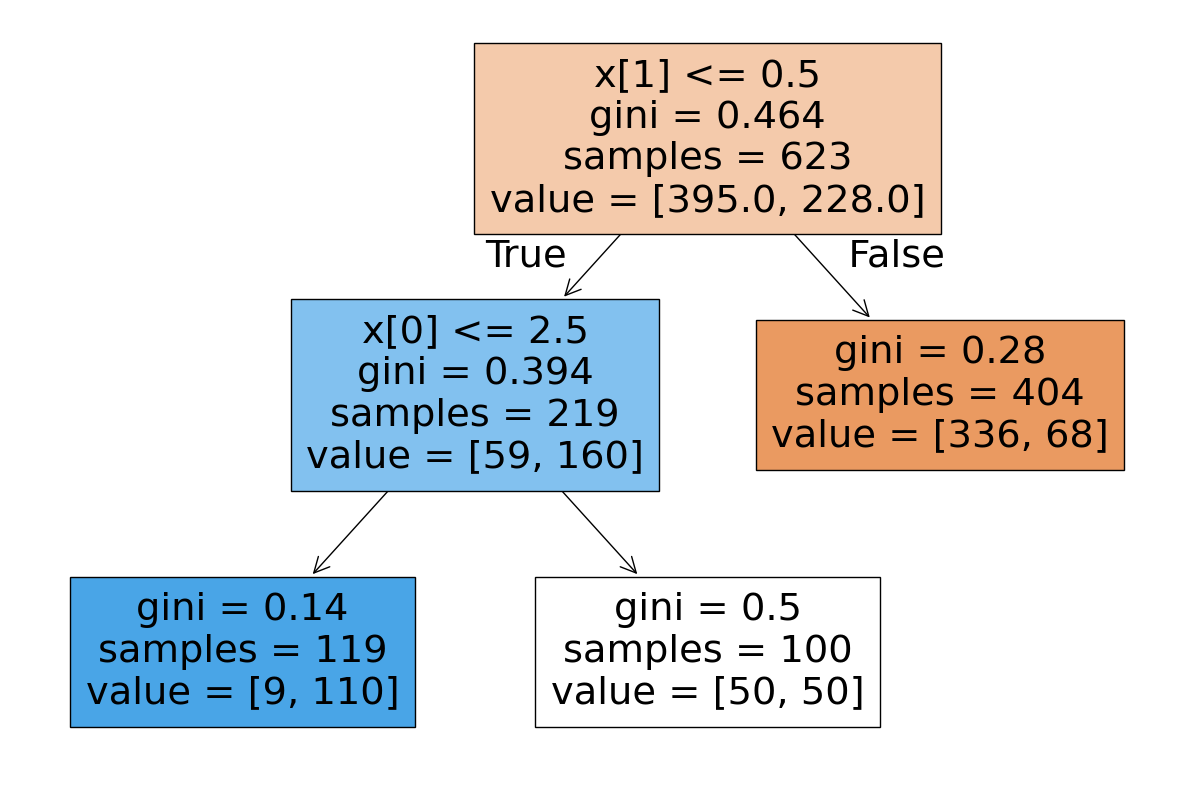

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

First, we import the necessary libraries: `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and `seaborn` for enhanced visualizations.

Next, we load the `Titanic.csv` dataset into a pandas DataFrame named `df`.

To get a quick overview of the dataset, we display the first 5 rows using the `head()` method.

We select a subset of relevant columns (`Survived`, `Pclass`, `Sex`, `Age`, `Fare`) from the DataFrame for our analysis.

After selecting the columns, we again display the first 5 rows to see the updated DataFrame.

We check for missing values in each column using `isnull().sum()` to understand the data completeness.

To handle missing 'Age' values, we calculate the mean age grouped by 'Sex'. This helps in filling missing ages with a more appropriate value based on gender.

We fill the missing 'Age' values by transforming the 'Age' column within each 'Sex' group, replacing `NaN` with the mean age of that specific gender.

To convert the categorical 'Sex' column into a numerical format, we import `LabelEncoder` from `sklearn.preprocessing`.

We initialize an instance of the `LabelEncoder`.

We apply the `LabelEncoder` to the 'Sex' column, converting 'male' and 'female' into numerical labels (e.g., 0 and 1).

We display the first few rows of the DataFrame again to verify the 'Sex' column has been converted to numerical values.

We separate the features (independent variables) into `X` and the target variable (dependent variable) into `y`. `X` contains 'Pclass', 'Sex', 'Age', and 'Fare', while `y` contains 'Survived'.

We import `train_test_split` from `sklearn.model_selection` to divide our dataset into training and testing sets. We use 70% of the data for training and 30% for testing, with a `random_state` for reproducibility.

We import the `DecisionTreeClassifier` from `sklearn.tree` to build our classification model.

We initialize the `DecisionTreeClassifier` with `random_state=0` for reproducibility and `criterion='gini'` for impurity measurement, then train the model using the training data (`X_train`, `y_train`).

To assess the model's performance on unseen data, we import `accuracy_score` from `sklearn.metrics`, predict on the test set (`X_test`), and then calculate the accuracy.

We predict on the training dataset (`X_train`) and calculate its accuracy to compare with the test accuracy, helping to identify overfitting.

We import the `tree` module from `sklearn` to visualize the decision tree. We set the figure size and plot the tree, filling the nodes with colors to represent classes, and then display the plot.

We import `classification_report` and `confusion_matrix` from `sklearn.metrics` to evaluate the model's performance on the test dataset. The classification report provides precision, recall, and F1-score, while the confusion matrix shows the counts of true/false positives/negatives.

Similarly, we generate the classification report and confusion matrix for the training dataset to understand how well the model performed on the data it was trained on.

We import `roc_curve`, `auc`, and `roc_auc_score` from `sklearn.metrics` to evaluate the model's performance using Receiver Operating Characteristic (ROC) curves.

We calculate the predicted probabilities for the positive class (survival) on the test set, which are necessary for computing the ROC curve.

We compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve using the true labels (`y_test`) and predicted probabilities (`dt_probs`).

We calculate the Area Under the Curve (AUC) for the ROC curve, which provides a single metric to summarize the model's overall performance across all possible classification thresholds.

We define a function `plot_roc_curve` to visualize the ROC curve. This function takes FPR and TPR as input and plots them, along with the AUC score, to illustrate the trade-off between true positive rate and false positive rate.

We call the `plot_roc_curve` function with the calculated `fpr_dt` and `tpr_dt` to display the ROC curve for our Decision Tree model.

To perform pruning, we calculate the `cost_complexity_pruning_path` for our Decision Tree. This gives us a list of `ccp_alphas` (complexity parameters) and their corresponding `impurities`.

We plot the `ccp_alphas` against the `total impurity of leaves`. This visualization helps us understand how the impurity changes as we vary the pruning parameter `alpha`.

We train a series of Decision Tree classifiers, each with a different `ccp_alpha` obtained from the pruning path. This creates a list of models (`clfs`) that are progressively more pruned. We then print the number of nodes in the last tree to show the effect of pruning.

We remove the last (fully pruned) classifier and its alpha, then plot the number of nodes and the depth of the tree against the `ccp_alpha` values. This helps visualize how pruning affects the size and complexity of the trees.

We calculate the accuracy scores for both the training and testing sets for each pruned tree. Then, we plot these scores against `ccp_alpha` to identify the optimal `alpha` value where the test accuracy is maximized, indicating a good balance between bias and variance.

Based on the `Accuracy vs alpha` plot, we select an optimal `ccp_alpha` (e.g., 0.016) to create a new, pruned Decision Tree classifier. We then train this pruned model on the training data.

We predict on the test dataset using the pruned model and calculate the `accuracy_score` to see the performance after pruning.

We predict on the training dataset using the pruned model and calculate the `accuracy_score` to see the performance after pruning, and compare it with the test accuracy.

Finally, we visualize the pruned Decision Tree. This plot will show a simpler tree structure compared to the unpruned tree, reflecting the effect of `ccp_alpha` in reducing complexity.

#Accuracy test

The accuracy score from the last cell (w9hw_x8hOi78) for the training dataset after pruning is approximately 0.7961 (or 79.61%). This means that the pruned decision tree model correctly predicted the survival status for about 79.61% of the examples in the training dataset.

Let's put this into context with other accuracy scores:

Before pruning:

Training accuracy: Approximately 0.9807 (98.07%)
Test accuracy: Approximately 0.7724 (77.24%)
After pruning (with ccp_alpha=0.016):

Training accuracy: Approximately 0.7961 (79.61%) - this is the value from the last cell you asked about
Test accuracy: Approximately 0.7649 (76.49%) (from cell ONb7UzW4Of3t)

#Training Accuracy:
 This measures how well your model performs on the data it was trained on. It tells you if the model has learned the patterns in the data it has seen. A high training accuracy generally means the model has successfully captured the relationships within the training set.

#Test Accuracy:
 This measures how well your model performs on new, unseen data. It's an estimate of how well the model will generalize to real-world data that it hasn't encountered before. A high test accuracy indicates that the model is robust and can make accurate predictions on new examples.

#Why are they different and why does it matter?

#Overfitting:
 If your training accuracy is very high, but your test accuracy is significantly lower, it usually indicates that your model has overfitted the training data. This means the model has learned the noise and specific details of the training set too well, rather than the underlying general patterns. As a result, it performs poorly on new data because those specific details and noise aren't present.

#Underfitting:
 If both training and test accuracy are low, the model might be underfitting. This means it hasn't learned enough from the training data and is too simple to capture the underlying patterns, leading to poor performance on both seen and unseen data.

#Good Generalization:
 Ideally, you want a model where both training and test accuracies are high and relatively close to each other. This suggests that the model has learned the general patterns effectively and can generalize well to new data.